In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

##### 产生一个随机数

In [2]:
rng = np.random.RandomState(1)
X = np.sort(10 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
X

array([[  1.14374817e-03],
       [  1.82882773e-01],
       [  1.93669579e-01],
       [  2.73875932e-01],
       [  3.90547832e-01],
       [  4.99534589e-01],
       [  5.33625451e-01],
       [  8.50442114e-01],
       [  9.23385948e-01],
       [  9.83468338e-01],
       [  1.02334429e+00],
       [  1.03226007e+00],
       [  1.30028572e+00],
       [  1.37474704e+00],
       [  1.39276347e+00],
       [  1.40386939e+00],
       [  1.46728575e+00],
       [  1.46755891e+00],
       [  1.65354197e+00],
       [  1.69830420e+00],
       [  1.86260211e+00],
       [  1.98101489e+00],
       [  2.04452250e+00],
       [  2.11628116e+00],
       [  2.65546659e+00],
       [  2.80443992e+00],
       [  2.87775339e+00],
       [  2.93614148e+00],
       [  3.02332573e+00],
       [  3.13424178e+00],
       [  3.15515631e+00],
       [  3.45560727e+00],
       [  3.47765860e+00],
       [  3.96767474e+00],
       [  3.97676837e+00],
       [  4.14055988e+00],
       [  4.14179270e+00],
 

##### 构建不同深度的决策树

In [4]:
clf_0 = DecisionTreeRegressor(max_depth=1)
clf_1 = DecisionTreeRegressor(max_depth=2)
clf_2 = DecisionTreeRegressor(max_depth=3)
clf_3 = DecisionTreeRegressor(max_depth=5)
clf_0.fit(X, y)
clf_1.fit(X, y)
clf_2.fit(X, y)
clf_3.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

##### 创建预测模拟数据

In [5]:
X_test = np.arange(0.0, 10, 0.01)[:, np.newaxis]
y_0 = clf_0.predict(X_test)
y_1 = clf_1.predict(X_test)
y_2 = clf_2.predict(X_test)
y_3 = clf_3.predict(X_test)

##### 画图

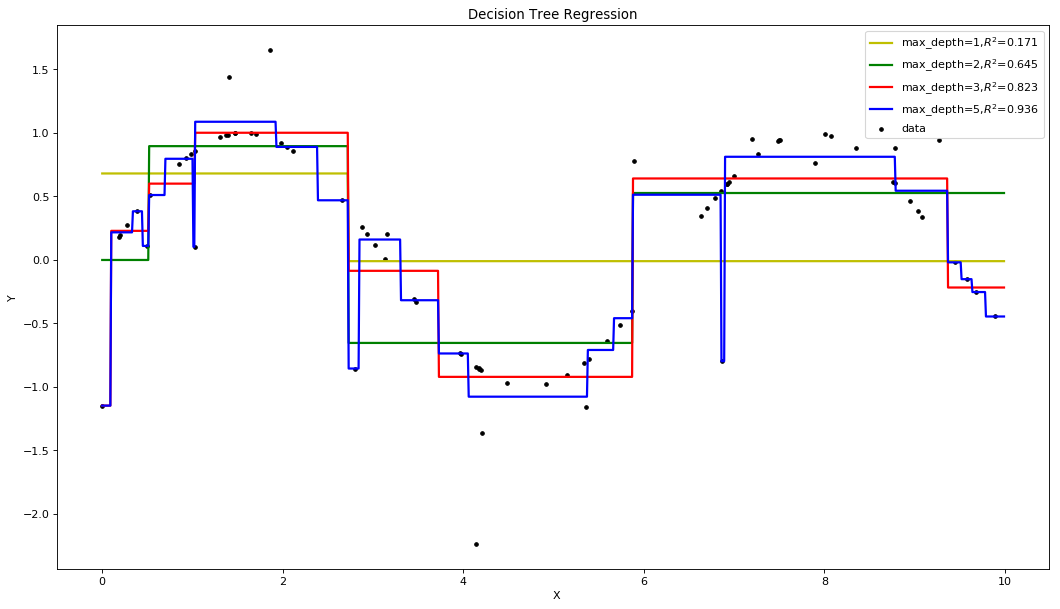

In [6]:
plt.figure(figsize=(16,9),dpi=80,facecolor='w')

plt.scatter(X, y, c="k", s=10,label="data")   # 样本点分布
plt.plot(X_test, y_0, c="y", label="max_depth=1,$R^2$=%.3f" % (clf_0.score(X, y)), linewidth=2)
plt.plot(X_test, y_1, c="g", label="max_depth=2,$R^2$=%.3f" % (clf_1.score(X, y)), linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=3,$R^2$=%.3f" % (clf_2.score(X, y)), linewidth=2)
plt.plot(X_test, y_3, c="b", label="max_depth=5,$R^2$=%.3f" % (clf_3.score(X, y)), linewidth=2)
plt.xlabel("X", horizontalalignment="left")
plt.ylabel("Y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()